In [1]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRFRegressor
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

/home/salekeen/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
house_price_dataset = sklearn.datasets.load_boston()

In [3]:
house_price_dataframe = pd.DataFrame(house_price_dataset.data,columns=house_price_dataset.feature_names)

In [4]:
house_price_dataframe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [21]:
house_price_dataframe.groupby(by='RAD').apply(print)


        CRIM    ZN  INDUS  CHAS     NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.5380  6.575  65.2  4.0900  1.0  296.0   
193  0.02187  60.0   2.93   0.0  0.4010  6.800   9.9  6.2196  1.0  265.0   
194  0.01439  60.0   2.93   0.0  0.4010  6.604  18.8  6.2196  1.0  265.0   
254  0.04819  80.0   3.64   0.0  0.3920  6.108  32.0  9.2203  1.0  315.0   
255  0.03548  80.0   3.64   0.0  0.3920  5.876  19.1  9.2203  1.0  315.0   
283  0.01501  90.0   1.21   1.0  0.4010  7.923  24.8  5.8850  1.0  198.0   
284  0.00906  90.0   2.97   0.0  0.4000  7.088  20.8  7.3073  1.0  285.0   
285  0.01096  55.0   2.25   0.0  0.3890  6.453  31.9  7.3073  1.0  300.0   
286  0.01965  80.0   1.76   0.0  0.3850  6.230  31.5  9.0892  1.0  241.0   
331  0.05023  35.0   6.06   0.0  0.4379  5.706  28.4  6.6407  1.0  304.0   
332  0.03466  35.0   6.06   0.0  0.4379  6.031  23.3  6.6407  1.0  304.0   
341  0.01301  35.0   1.52   0.0  0.4420  7.241  49.3  7.0379  1.0  284.0   
342  0.02498

""


In [7]:
# adding target column
house_price_dataframe['price'] = house_price_dataset.target

In [8]:
house_price_dataframe.shape

(506, 14)

In [9]:
# check for null values
house_price_dataframe.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [10]:
#looks nice

In [11]:
house_price_dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
# checking for correlation between the features
correlation = house_price_dataframe.corr()

<AxesSubplot:>

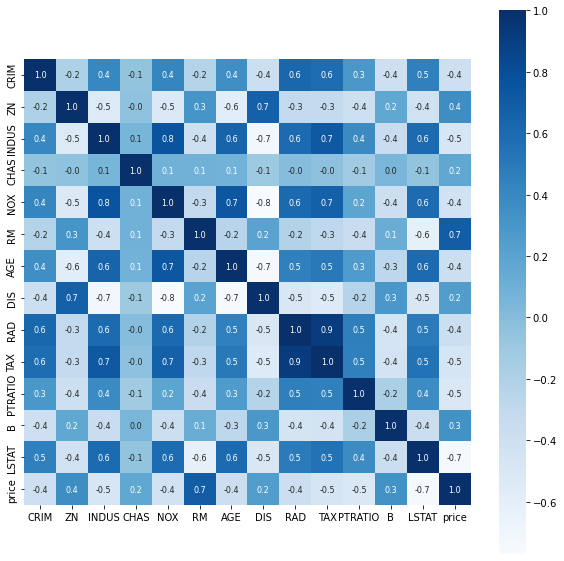

In [13]:
# generating heatmap
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [14]:
# splitting the dataset
X = house_price_dataframe.drop(['price'],axis=1)
Y = house_price_dataframe['price']

In [15]:
# making train test split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [16]:
# lets train our model now
model = XGBRFRegressor()

In [17]:
model.fit(X_train,Y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, enable_categorical=False, gamma=0, gpu_id=-1,
               importance_type=None, interaction_constraints='',
               max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=100, n_jobs=6,
               num_parallel_tree=100, objective='reg:squarederror',
               predictor='auto', random_state=0, reg_alpha=0,
               scale_pos_weight=1, tree_method='exact', validate_parameters=1,
               verbosity=None)

In [18]:
# accuracy on training data
training_data_prediction = model.predict(X_train)
score1 = metrics.r2_score(Y_train,training_data_prediction)
score2 = metrics.mean_absolute_error(Y_train,training_data_prediction)

print("R squared error: ", score1)
print("MAE: ",score2)

R squared error:  0.9638005018704447
MAE:  1.3740199532839332


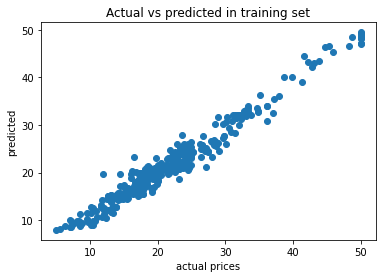

In [19]:
# visualizing
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("actual prices")
plt.ylabel("predicted")
plt.title("Actual vs predicted in training set")
plt.show()

In [20]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [21]:
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9012963200692172
Mean Absolute Error :  2.153043132669785
